In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [23]:
D = np.random.randn(1000, 500)
hidden_layer_sizes = [500]*10  # 隐藏层尺寸都是500，10层
nonlinearities = ['tanh']*len(hidden_layer_sizes)  # 非线性函数都是用tanh函数
act = {'relu': lambda x: np.maximum(0, x), 'tanh': lambda x: np.tanh(x)}
Hs = {}
for i in range(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1]  # 当前隐藏层的输入
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) * 0.01  # 权重初始化
    H = np.dot(X, W)  # 得到当前层输出
    H = act[nonlinearities[i]](H)  # 激活函数
    Hs[i] = H  # 保存当前层的结果并作为下层的输入


In [36]:
print('输入层的均值：%f 方差：%f'% (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i,H in Hs.items()]
layer_stds = [np.std(H) for i,H in Hs.items()]
layer_means

输入层的均值：-0.001792 方差：1.001550


[-0.00044426366089453254,
 -2.387293956206169e-06,
 5.011804767295177e-06,
 4.315606942344846e-06,
 3.0212310769195466e-07,
 -1.8857813660049575e-07,
 5.658766361928958e-09,
 5.056488855065296e-09,
 1.5666497861355876e-09,
 7.763752185949662e-11]

In [41]:
for i,H in Hs.items():
    print('隐藏层%d的均值：%f 方差：%f' % (i+1, layer_means[i], layer_stds[i]))

隐藏层1的均值：-0.000444 方差：0.213610
隐藏层2的均值：-0.000002 方差：0.047555
隐藏层3的均值：0.000005 方差：0.010647
隐藏层4的均值：0.000004 方差：0.002377
隐藏层5的均值：0.000000 方差：0.000531
隐藏层6的均值：-0.000000 方差：0.000119
隐藏层7的均值：0.000000 方差：0.000027
隐藏层8的均值：0.000000 方差：0.000006
隐藏层9的均值：0.000000 方差：0.000001
隐藏层10的均值：0.000000 方差：0.000000


Text(0.5, 1.0, 'layer std')

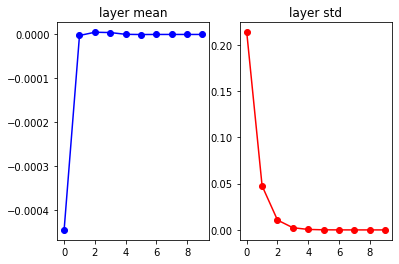

In [82]:
plt.figure()
plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(list(Hs.keys()), layer_stds, 'or-')
plt.title('layer std')

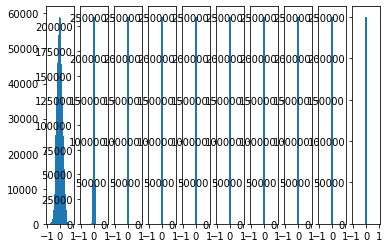

In [88]:
plt.figure()

for i,H in Hs.items():
  plt.subplot(1, len(Hs), i+1)
  plt.hist(H.ravel(), 30, range=(-1,1))

plt.show()


In [89]:
def init_two_layer_model(input_size, hidden_size, output_size):
    model = {}
    model["W1"] = 0.0001 * np.random.randn(input_size, hidden_size)
    model['b1'] = np.zeros(hidden_size)
    model['W2'] = 0.0001 * np.random.randn(hidden_size, output_size)
    model['b2'] = np.zeros(output_size)
    return model
model = init_two_layer_model(32*32*3, 50, 10)
loss, grad = two_layer_net(X_train, model, y_train, 0)  # 0没有正则损失
print(loss)

NameError: ignored